In [1]:

# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [8]:
df=pd.read_csv("plotting.csv")
df

,Rank,Name,City,Code,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website,lat,lon,State
0,1,Harvard University,Cambridge,MA,Private,13844,31120,14327.0,49870.0,69600,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu,42.375100,-71.105616,Massachusetts
1,2,Stanford University,Stanford,CA,Private,8402,17534,13261.0,50134.0,69109,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu,37.426541,-122.170293,California
2,3,Yale University,New Haven,CT,Private,6483,12974,18627.0,50897.0,71290,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu,41.308214,-72.925052,Connecticut
3,4,Massachusetts Institute of Technology,Cambridge,MA,Private,4680,11466,20771.0,43248.0,67430,155200.0,7.0,1490.0,1570.0,33.0,35.0,www.web.mit.edu,42.375100,-71.105616,Massachusetts
4,5,Princeton University,Princeton,NJ,Private,5659,8273,9327.0,48088.0,66150,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu,40.349274,-74.659296,New Jersey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,646,New Mexico State University,Las Cruces,NM,Public,13379,14432,8625.0,9582.0,34720,96700.0,64.0,910.0,1160.0,18.0,23.0,www.nmsu.edu,32.314035,-106.779808,New Mexico
646,647,Indiana State University,Terre Haute,IN,Public,13626,13763,13012.0,9297.0,32938,85600.0,85.0,900.0,1110.0,17.0,23.0,www.indstate.edu,39.466703,-87.413912,Indiana
647,648,Emory &amp; Henry College,Emory,VA,Private,1094,1226,19340.0,27155.0,48100,70700.0,72.0,988.0,1170.0,19.0,25.0,www.ehc.edu,36.772891,-81.836234,Virginia
648,649,Wells College,Aurora,NY,Private,488,516,22828.0,30207.0,55180,NaN,80.0,NaN,NaN,NaN,NaN,www.wells.edu,42.733841,-78.637707,New York


In [9]:
df.shape

(650, 20)

In [10]:
df2=df.dropna()

In [12]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this
df2["SAT mean"]=(df2["SAT Lower"]+df2["SAT Upper"])/2

X = df2["SAT mean"].values.reshape(-1, 1)
y = df2["Acceptance Rate"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (523, 1) (523, 1)


<ipython-input-12-fe75084b2e15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["SAT mean"]=(df2["SAT Lower"]+df2["SAT Upper"])/2


In [11]:
df2.shape

(523, 20)

In [13]:
df2.count()

Rank                        523
Name                        523
City                        523
Code                        523
Public/Private              523
Undergraduate Population    523
Student Population          523
Net Price                   523
Average Grant Aid           523
Total Annual Cost           523
Alumni Salary               523
Acceptance Rate             523
SAT Lower                   523
SAT Upper                   523
ACT Lower                   523
ACT Upper                   523
Website                     523
lat                         523
lon                         523
State                       523
SAT mean                    523
dtype: int64

Text(0, 0.5, 'Acceptance Rate')

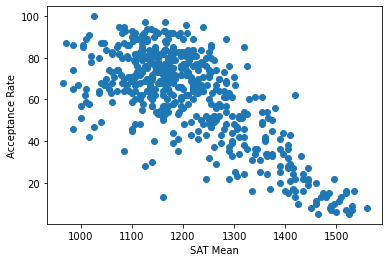

In [14]:
plt.scatter(X, y)
plt.xlabel("SAT Mean")
plt.ylabel("Acceptance Rate")

-0.13490172943503143 224.97964861952516
y = -0.13x + 224.98


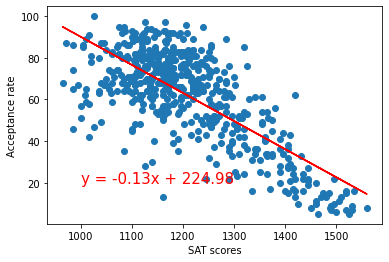

In [16]:
# Add the linear regression equation and line to plot
x_values = df2["SAT mean"]
y_values = df2["Acceptance Rate"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(slope,intercept)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1000,20),fontsize=15,color="red")
plt.xlabel('SAT scores')
plt.ylabel('Acceptance rate')
plt.show()

0.0057215799234922446 644.2271397078271
y = 0.01x + 644.23


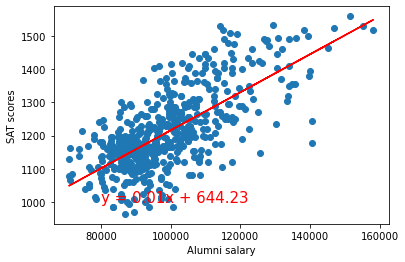

In [20]:
# Add the linear regression equation and line to plot
x_values = df2["Alumni Salary"]
y_values = df2["SAT mean"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(slope,intercept)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80000,1000),fontsize=15,color="red")
plt.ylabel('SAT scores')
plt.xlabel('Alumni salary')
plt.show()

In [32]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
# array([1, 1, 1, 0, 0, 0], dtype=int32)
kmeans.predict([[0, 0], [12, 3]])
#array([1, 0], dtype=int32)
kmeans.cluster_centers_
#array([[10.,  2.],[ 1.,  2.]])

array([[10.,  2.],
       [ 1.,  2.]])

In [37]:
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [33]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [39]:
kmeans.predict([[0, 1], [2, 3]])

array([1, 1])

In [35]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [61]:
df1=df.dropna()

In [1]:
df1

NameError: name 'df1' is not defined

In [66]:
df1.reset_index(inplace=True)

In [67]:

new_x=[]
for i in range(523):
    new_x.append([df1["SAT mean"][i],df1["Acceptance Rate"][i]])

In [68]:
len(new_x)

523

In [69]:
new_x=np.array(new_x)

In [70]:
new_x

array([[1525.,    5.],
       [1465.,    5.],
       [1520.,    7.],
       ...,
       [1005.,   85.],
       [1079.,   72.],
       [1015.,   42.]])

In [71]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=5, random_state=0).fit(new_x)
kmeans.labels_


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 3, 3,
       1, 1, 1, 3, 3, 1, 1, 1, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 2, 3, 3, 1, 2, 1, 1, 3, 2, 3, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 3, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 4, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       3, 2, 1, 1, 2, 2, 2, 2, 4, 2, 1, 4, 4, 1, 2, 2, 4, 2, 1, 4, 2, 2,
       1, 1, 2, 1, 4, 4, 2, 2, 2, 4, 4, 1, 2, 2, 4, 2, 2, 4, 4, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 0, 4, 2, 4, 4, 4, 2,
       2, 2, 2, 2, 1, 4, 2, 4, 4, 4, 2, 1, 2, 2, 4, 4, 0, 4, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 1, 4, 4, 4, 2, 4, 4, 2, 0, 4, 4, 0, 2, 1, 2, 4, 4, 4, 4, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2,

In [73]:
kmeans.predict([[1430, 40], [1250, 20]])

array([3, 2])

In [72]:
kmeans.cluster_centers_

array([[1046.97794118,   73.05882353],
       [1320.70945946,   46.91891892],
       [1226.928     ,   66.6       ],
       [1450.38135593,   19.93220339],
       [1144.41624365,   72.52791878]])